# Lab 3

### import all the needed functions

In [1]:
import cv2 as cv
import numpy as np
import time
import random
import math
from matplotlib import pyplot as plt

### Canny Edge Detection

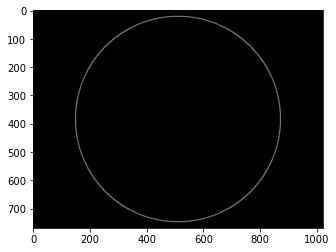

In [2]:
pic_circle = cv.imread('circle.jpg')
clock = cv.imread("parliament_clock.jpg")
concentric = cv.imread("concentric_circles.jpg")
e1 = 1
size = [pic_circle.shape[0],pic_circle.shape[1]]
empty = np.zeros((size[0],size[1]),dtype=np.uint8)

point = []
circle = cv.Canny(pic_circle,50,100)
plt.imshow(circle,cmap = 'gray')

for a in range(circle.shape[0]):
    for b in range(circle.shape[1]):
        if circle[a,b] == 255:
            point.append([a,b])

### Three Point Circle Fitting by using  “Perpendicular Bisector” method

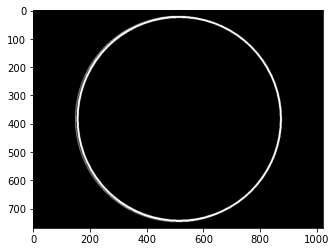

In [3]:
def Collinearity(point): 
    diff = 0
    while diff == 0  :
        temp = random.sample(point,3)
        diff = (temp[2][1] - temp[0][1])*(temp[1][0] - temp[0][0]) - (temp[1][1]-temp[0][1])*(temp[2][0]-temp[0][0])
    return temp

def FindCircle(points): 
    center = []
    radius = 0
    try:
        line1 = FindSlope(points[0],points[1])
        line2 = FindSlope(points[0],points[2])
    except:
        print("There is a error: ",points) 
    center = FindIntersection(line1,line2)
    radius = FindRadius(center,points[0])
    return (center,int(radius))

def FindSlope(P1, P2): 
    a = 0
    b = 0
    c = 0
    a = 2 * (P2[0] - P1[0])
    b = 2 * (P2[1] - P1[1])
    c = (P1[0]**2 - P2[0]**2) + (P1[1]**2 - P2[1]**2)
    return [a,b,c]

def FindIntersection(L1, L2): 
    a = 0
    i = 0
    j = 0
    a = L1[0]*L2[1] - L2[0]*L1[1] 
    i = (L2[2]*L1[1] - L1[2]*L2[1]) / a 
    j = (L1[2]*L2[0] - L2[2]*L1[0]) / a 
    return[int(i),int(j)]
    
def FindRadius(center,point):
    return math.sqrt(pow((center[0] - point[0]),2) + pow((center[1] - point[1]),2))

points = Collinearity(point)
(center,radius) = FindCircle(points)
pic1 = cv.circle(circle, (center[1],center[0]), radius, (255,0,0), 5)
plt.imshow(pic1,cmap = 'gray')

### RANSAC

In [4]:
def check_valid(edge,size):
    points = []
    for a in range(size[0]):
        for b in range(size[1]):
            if edge[a,b] == 255:
                points.append([a,b])
    return points

def algorithm(edge,size):
    threshold = 0.5
    N = 10000
    I = 0
    C = -1
    best_circle = ([0,0],0)
    val = 0
    points = check_valid(edge,size)
    result = []
    while I < N:
        K = 0
        ratio = 0
        point = Collinearity(points)
        center = []
        radius = 0
        center,radius= FindCircle(point)
        circle_parameter = (center,radius)
        K,ratio = PixelNumbers(edge, circle_parameter,size)
        I += 1
        
        if ratio > val and K > C * 0.5:
            print("\nNew round")
            best_circle = circle_parameter
            C = K
            val = ratio
            
        if ratio > threshold:
            print("\nDone") 
            print("ratio = ",ratio)
            print("circle = ",best_circle)
            break
            
        pctge = I / N
        print('\r'+"Iteration = "+str(I)+"  "+str(pctge)+"%",end=' ')
    return best_circle

def PixelNumbers(edge, circle_parameter,size):
    K = 0
    ratio = 0
    new = np.zeros((size[0],size[1]),dtype=np.uint8)
    cv.circle(new,(circle_parameter[0][1],circle_parameter[0][0]),circle_parameter[1],(255,255,255),e1)
    
    for a in range(size[0]):
        for b in range(size[1]):
            if new[a,b] == 255:
                ratio += 1
            if edge[a,b] == 255 and new[a,b] == 255:
                K += 1
    try:
        ratio = K / ratio
        return K, ratio
    except:
        print("Error on ratio")
        print("Circle parameter:",circle_parameter)
        return 0,0

### Post Processing

In [5]:
def Post(good_point):
    center_mean = np.mean(good_point,axis=0)
    center_radius = []
    for a in good_point:
        center_radius.append(FindRadius(a,center_mean))
    center_radius = np.mean(center_radius,axis=0)
    return ((int(center_mean[0]),int(center_mean[1])),int(center_radius))

### Main function



RANSAC parliament_clock.jpg

New round
Iteration = 3  0.0003% 
New round
Iteration = 31  0.0031% 
New round
Iteration = 44  0.0044% 
New round
Iteration = 49  0.0049% 
New round
Iteration = 62  0.0062% 
New round
Iteration = 107  0.0107% 
New round
Iteration = 151  0.0151% 
New round
Iteration = 301  0.0301% 
New round
Iteration = 1132  0.1132% 
New round
Iteration = 1638  0.1638% 
New round
Iteration = 3745  0.3745% 
New round
Iteration = 10000  1.0% % 
The estimated circle center and radius values before preprocessing ([97, 142], 44)


RANSAC concentric_circles.jpg

New round
Iteration = 1  0.0001% 
New round
Iteration = 5  0.0005% 
New round
Iteration = 11  0.0011% 
New round
Iteration = 13  0.0013% 
New round
Iteration = 17  0.0017% 
New round
Iteration = 22  0.0022% 
New round
Iteration = 26  0.0026% 
New round
Iteration = 36  0.0036% 
New round
Iteration = 101  0.0101% 
New round
Iteration = 169  0.0169% 
New round
Iteration = 694  0.0694% 
New round
Iteration = 3550  0.355%  


<Figure size 1800x1200 with 0 Axes>

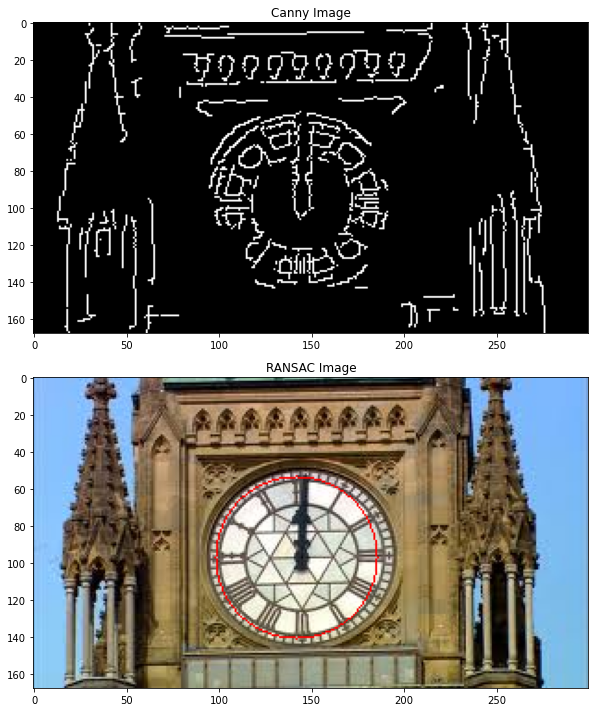

<Figure size 1800x1200 with 0 Axes>

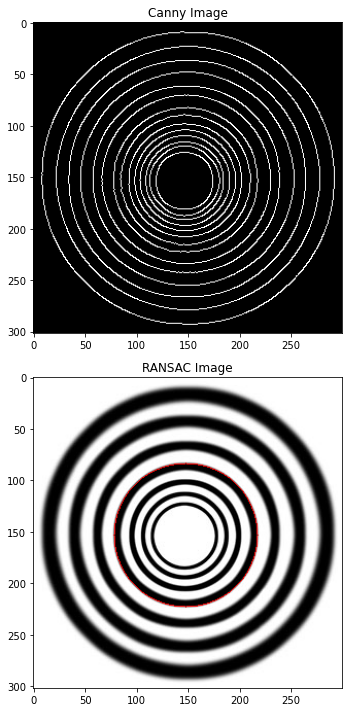

In [6]:
def Main(pic_circle):
    print("\n\nRANSAC",pic_circle)

    pic_circle = cv.imread(pic_circle)
    temp = np.copy(pic_circle)
    pic_circle = cv.cvtColor(pic_circle,cv.COLOR_BGR2GRAY)
    pic_circle = cv.GaussianBlur(pic_circle,(7,7),10)
    pic_circle = cv.Canny(pic_circle,100,150)
    size = [pic_circle.shape[0],pic_circle.shape[1]]
    best_circle = algorithm(pic_circle,size)
    print("\nThe estimated circle center and radius values before preprocessing",best_circle)

    cv.circle(temp,(best_circle[0][1],best_circle[0][0]),best_circle[1],(0,0,255),e1)

    plt.figure(dpi=300)
    plt.figure(figsize=(10,10))

    plt.subplot(2,1,1)
    plt.imshow(cv.cvtColor(pic_circle,cv.COLOR_BGR2RGB))
    plt.title("Canny Image")
    plt.subplot(2,1,2)
    plt.imshow(cv.cvtColor(temp,cv.COLOR_BGR2RGB))
    plt.title("RANSAC Image")

    plt.tight_layout()

Main("parliament_clock.jpg")
Main("concentric_circles.jpg")



Post Processing parliament_clock.jpg

New round
Iteration = 2  0.0002% 
New round
Iteration = 101  0.0101% 
New round
Iteration = 132  0.0132% 
New round
Iteration = 171  0.0171% 
New round
Iteration = 198  0.0198% 
New round
Iteration = 4402  0.4402% 
New round
Iteration = 10000  1.0% % 
The estimated circle center and radius values after preprocessing ((97, 148), 30)


Post Processing concentric_circles.jpg

New round
Iteration = 12  0.0012% 
New round
Iteration = 25  0.0025% 
New round
Iteration = 44  0.0044% 
New round
Iteration = 98  0.0098% 
New round
Iteration = 110  0.011%  
New round
Iteration = 240  0.024%  
New round
Iteration = 322  0.0322% 
New round
Iteration = 570  0.057%  
New round
Iteration = 2231  0.2231% 
New round

Done
ratio =  0.532312925170068
circle =  ([151, 149], 104)

The estimated circle center and radius values after preprocessing ((151, 149), 103)


<Figure size 1800x1200 with 0 Axes>

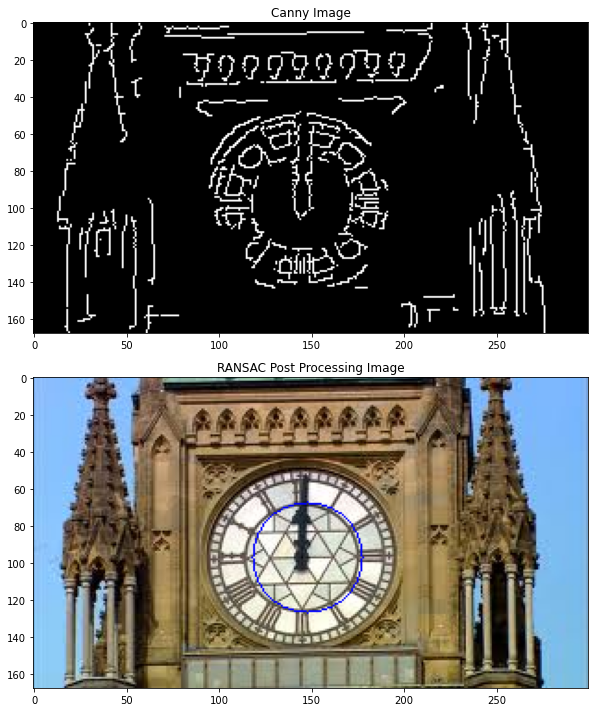

<Figure size 1800x1200 with 0 Axes>

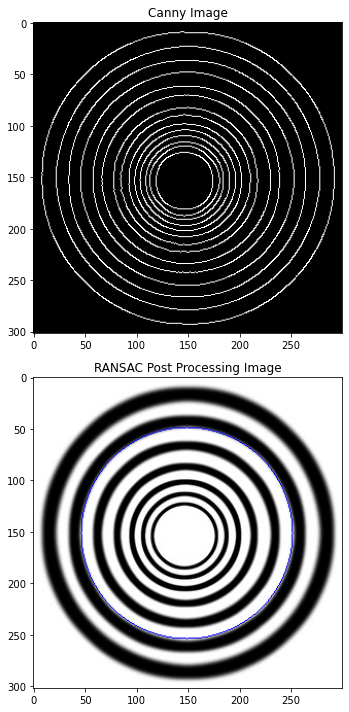

In [7]:
def MainPost(pic_circle):
    print("\n\nPost Processing",pic_circle)

    pic_circle = cv.imread(pic_circle)
    temp = np.copy(pic_circle)
    pic_circle = cv.cvtColor(pic_circle,cv.COLOR_BGR2GRAY)
    pic_circle = cv.GaussianBlur(pic_circle,(7,7),10)
    pic_circle = cv.Canny(pic_circle,100,150)
    size = [pic_circle.shape[0],pic_circle.shape[1]]
    best_circle = algorithm(pic_circle,size)

    good_point = []
    temp_2 = np.zeros((size[0],size[1]),dtype=np.uint8)
    cv.circle(temp_2,(best_circle[0][1],best_circle[0][0]),best_circle[1],(255,255,255),e1)
    try:
        good_point = check_valid(temp_2,size)
        best_circle = Post(good_point)
    except:
        cv.imshow("Error",temp_2)
        print("good point",good_point)
        print("best circle",best_circle)

    plt.figure(dpi=300)
    plt.figure(figsize=(10,10))
    print("\nThe estimated circle center and radius values after preprocessing",best_circle)
    cv.circle(temp,(best_circle[0][1],best_circle[0][0]),best_circle[1],(255,0,0),e1)

    plt.subplot(2,1,1)
    plt.imshow(cv.cvtColor(pic_circle,cv.COLOR_BGR2RGB))
    plt.title("Canny Image")
    plt.subplot(2,1,2)
    plt.imshow(cv.cvtColor(temp,cv.COLOR_BGR2RGB))
    plt.title("RANSAC Post Processing Image")

    plt.tight_layout()

MainPost("parliament_clock.jpg")
MainPost("concentric_circles.jpg")